In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
news_data = pd.read_csv('/content/drive/MyDrive/dataset projects/train.csv')

In [ ]:
news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
#replacing null values with empty string
news_data + news_data.fillna('')

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell LucusDarrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,2
1,2,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. FlynnDaniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,4,Why the Truth Might Get You FiredWhy the Truth...,Consortiumnews.comConsortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",2
3,6,15 Civilians Killed In Single US Airstrike Hav...,Jessica PurkissJessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,2
4,8,Iranian woman jailed for fictional unpublished...,Howard PortnoyHoward Portnoy,Print \nAn Iranian woman has been sentenced to...,2
...,...,...,...,...,...
20795,41590,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome HudsonJerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,41592,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin HoffmanBenjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,41594,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel AbramsMicha...,The Macy’s of today grew from the union of sev...,0
20798,41596,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex AnsaryAlex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",2


In [ ]:
'''instead of using the text to predict we are gonna use the combo of title and author
..processing text may take a lot of computation..so we are gonna use only the title and author'''
#merging the author name and news title
news_data['content']= news_data['author']+''+news_data['title']
news_data['content']

0        Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1        Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2        Consortiumnews.comWhy the Truth Might Get You ...
3        Jessica Purkiss15 Civilians Killed In Single U...
4        Howard PortnoyIranian woman jailed for fiction...
                               ...                        
20795    Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796    Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...
20797    Michael J. de la Merced and Rachel AbramsMacy’...
20798    Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799               David SwansonWhat Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [ ]:
#separating the data & label
X=news_data.drop('label',axis=1)
y=news_data['label']

#stemming : process of reducing a word to its root word

In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_and_stem(text):
    if isinstance(text, str):  # Check if the value is a string
        words = nltk.word_tokenize(text)  # Tokenize the text into words
        stemmed_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
        return ' '.join(stemmed_words)  # Return the stemmed text as a single string
    else:
        return ''  # Return an empty string for non-string values

In [ ]:
news_data['content'] = news_data['content'].apply(preprocess_and_stem)


In [ ]:
news_data['content']

0        darrel lucushous dem aid : ’ even see comey ’ ...
1        daniel j. flynnflynn : hillari clinton , big w...
2               consortiumnews.comwhi truth might get fire
3        jessica purkiss15 civilian kill singl us airst...
4        howard portnoyiranian woman jail fiction unpub...
                               ...                        
20795    jerom hudsonrapp t.i . : trump ’ poster child ...
20796    benjamin hoffmann.f.l . playoff : schedul , ma...
20797    michael j. de la merc rachel abramsmaci ’ said...
20798    alex ansarynato , russia hold parallel exercis...
20799                     david swansonwhat keep f-35 aliv
Name: content, Length: 20800, dtype: object

In [ ]:
import string
def remove_punctuation(text):
    # Use string.punctuation to get a string of all punctuation characters
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Apply the remove_punctuation function to the 'content' column
news_data['content'] = news_data['content'].apply(remove_punctuation)
news_data['content']

0        darrel lucushous dem aid  ’ even see comey ’ l...
1        daniel j flynnflynn  hillari clinton  big woma...
2                consortiumnewscomwhi truth might get fire
3        jessica purkiss15 civilian kill singl us airst...
4        howard portnoyiranian woman jail fiction unpub...
                               ...                        
20795    jerom hudsonrapp ti   trump ’ poster child whi...
20796    benjamin hoffmannfl  playoff  schedul  matchup...
20797    michael j de la merc rachel abramsmaci ’ said ...
20798    alex ansarynato  russia hold parallel exercis ...
20799                      david swansonwhat keep f35 aliv
Name: content, Length: 20800, dtype: object

In [ ]:
#separating the data and label
X = news_data['content'].values
Y = news_data['label'].values

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 27324)	0.2830092866472602
  (0, 23703)	0.256743557159398
  (0, 15809)	0.4245878916512094
  (0, 15346)	0.2938098169250104
  (0, 13596)	0.24437854824109023
  (0, 8721)	0.22894055337066938
  (0, 6972)	0.2836940094845666
  (0, 6667)	0.3539690624922059
  (0, 5732)	0.247716577857814
  (0, 4964)	0.367160940949379
  (0, 1207)	0.2707539542253617
  (1, 28971)	0.37555236963701577
  (1, 12136)	0.2490577929327506
  (1, 9506)	0.5190572385620544
  (1, 6611)	0.3154593097731007
  (1, 5512)	0.2394818937912425
  (1, 4615)	0.4560932833409079
  (1, 4029)	0.1841335353530134
  (1, 3364)	0.3587726592275029
  (2, 27217)	0.4031164680747763
  (2, 17153)	0.4676452136116156
  (2, 10236)	0.33533565663842835
  (2, 9294)	0.3746826820139224
  (2, 5940)	0.6049528515006705
  (3, 27683)	0.21169601381667208
  :	:
  (20797, 26296)	0.30859805041361
  (20797, 23034)	0.2536466346658985
  (20797, 21718)	0.27476281563846056
  (20797, 21436)	0.24828388818686592
  (20797, 18284)	0.07918870736638582
  (20797, 17105)	0.176815

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.97265625


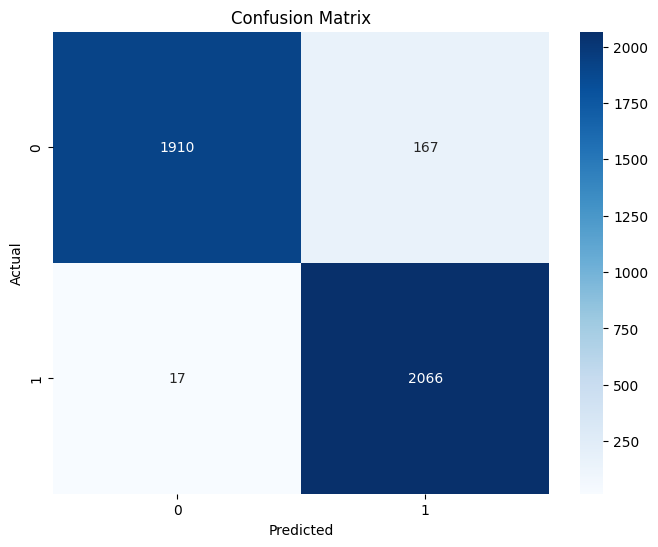

Accuracy: 0.9557692307692308


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Replace Y_test and predicted_values with your actual data
test = np.array(Y_test)  # True values (0 or 1)
predicted_values = np.array(model.predict(X_test))  # Predicted values (0 or 1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test, predicted_values)

# Calculate the accuracy
accuracy = accuracy_score(test, predicted_values)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Set plot labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Print the accuracy
print('Accuracy:', accuracy)
